In [ ]:
  %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import MinMaxScaler



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
wines = datasets.load_wine()
labels = wines.feature_names
target = wines.target
normalizador = MinMaxScaler()
#X = wines.data[:, cols]
wines = normalizador.fit_transform( wines.data )


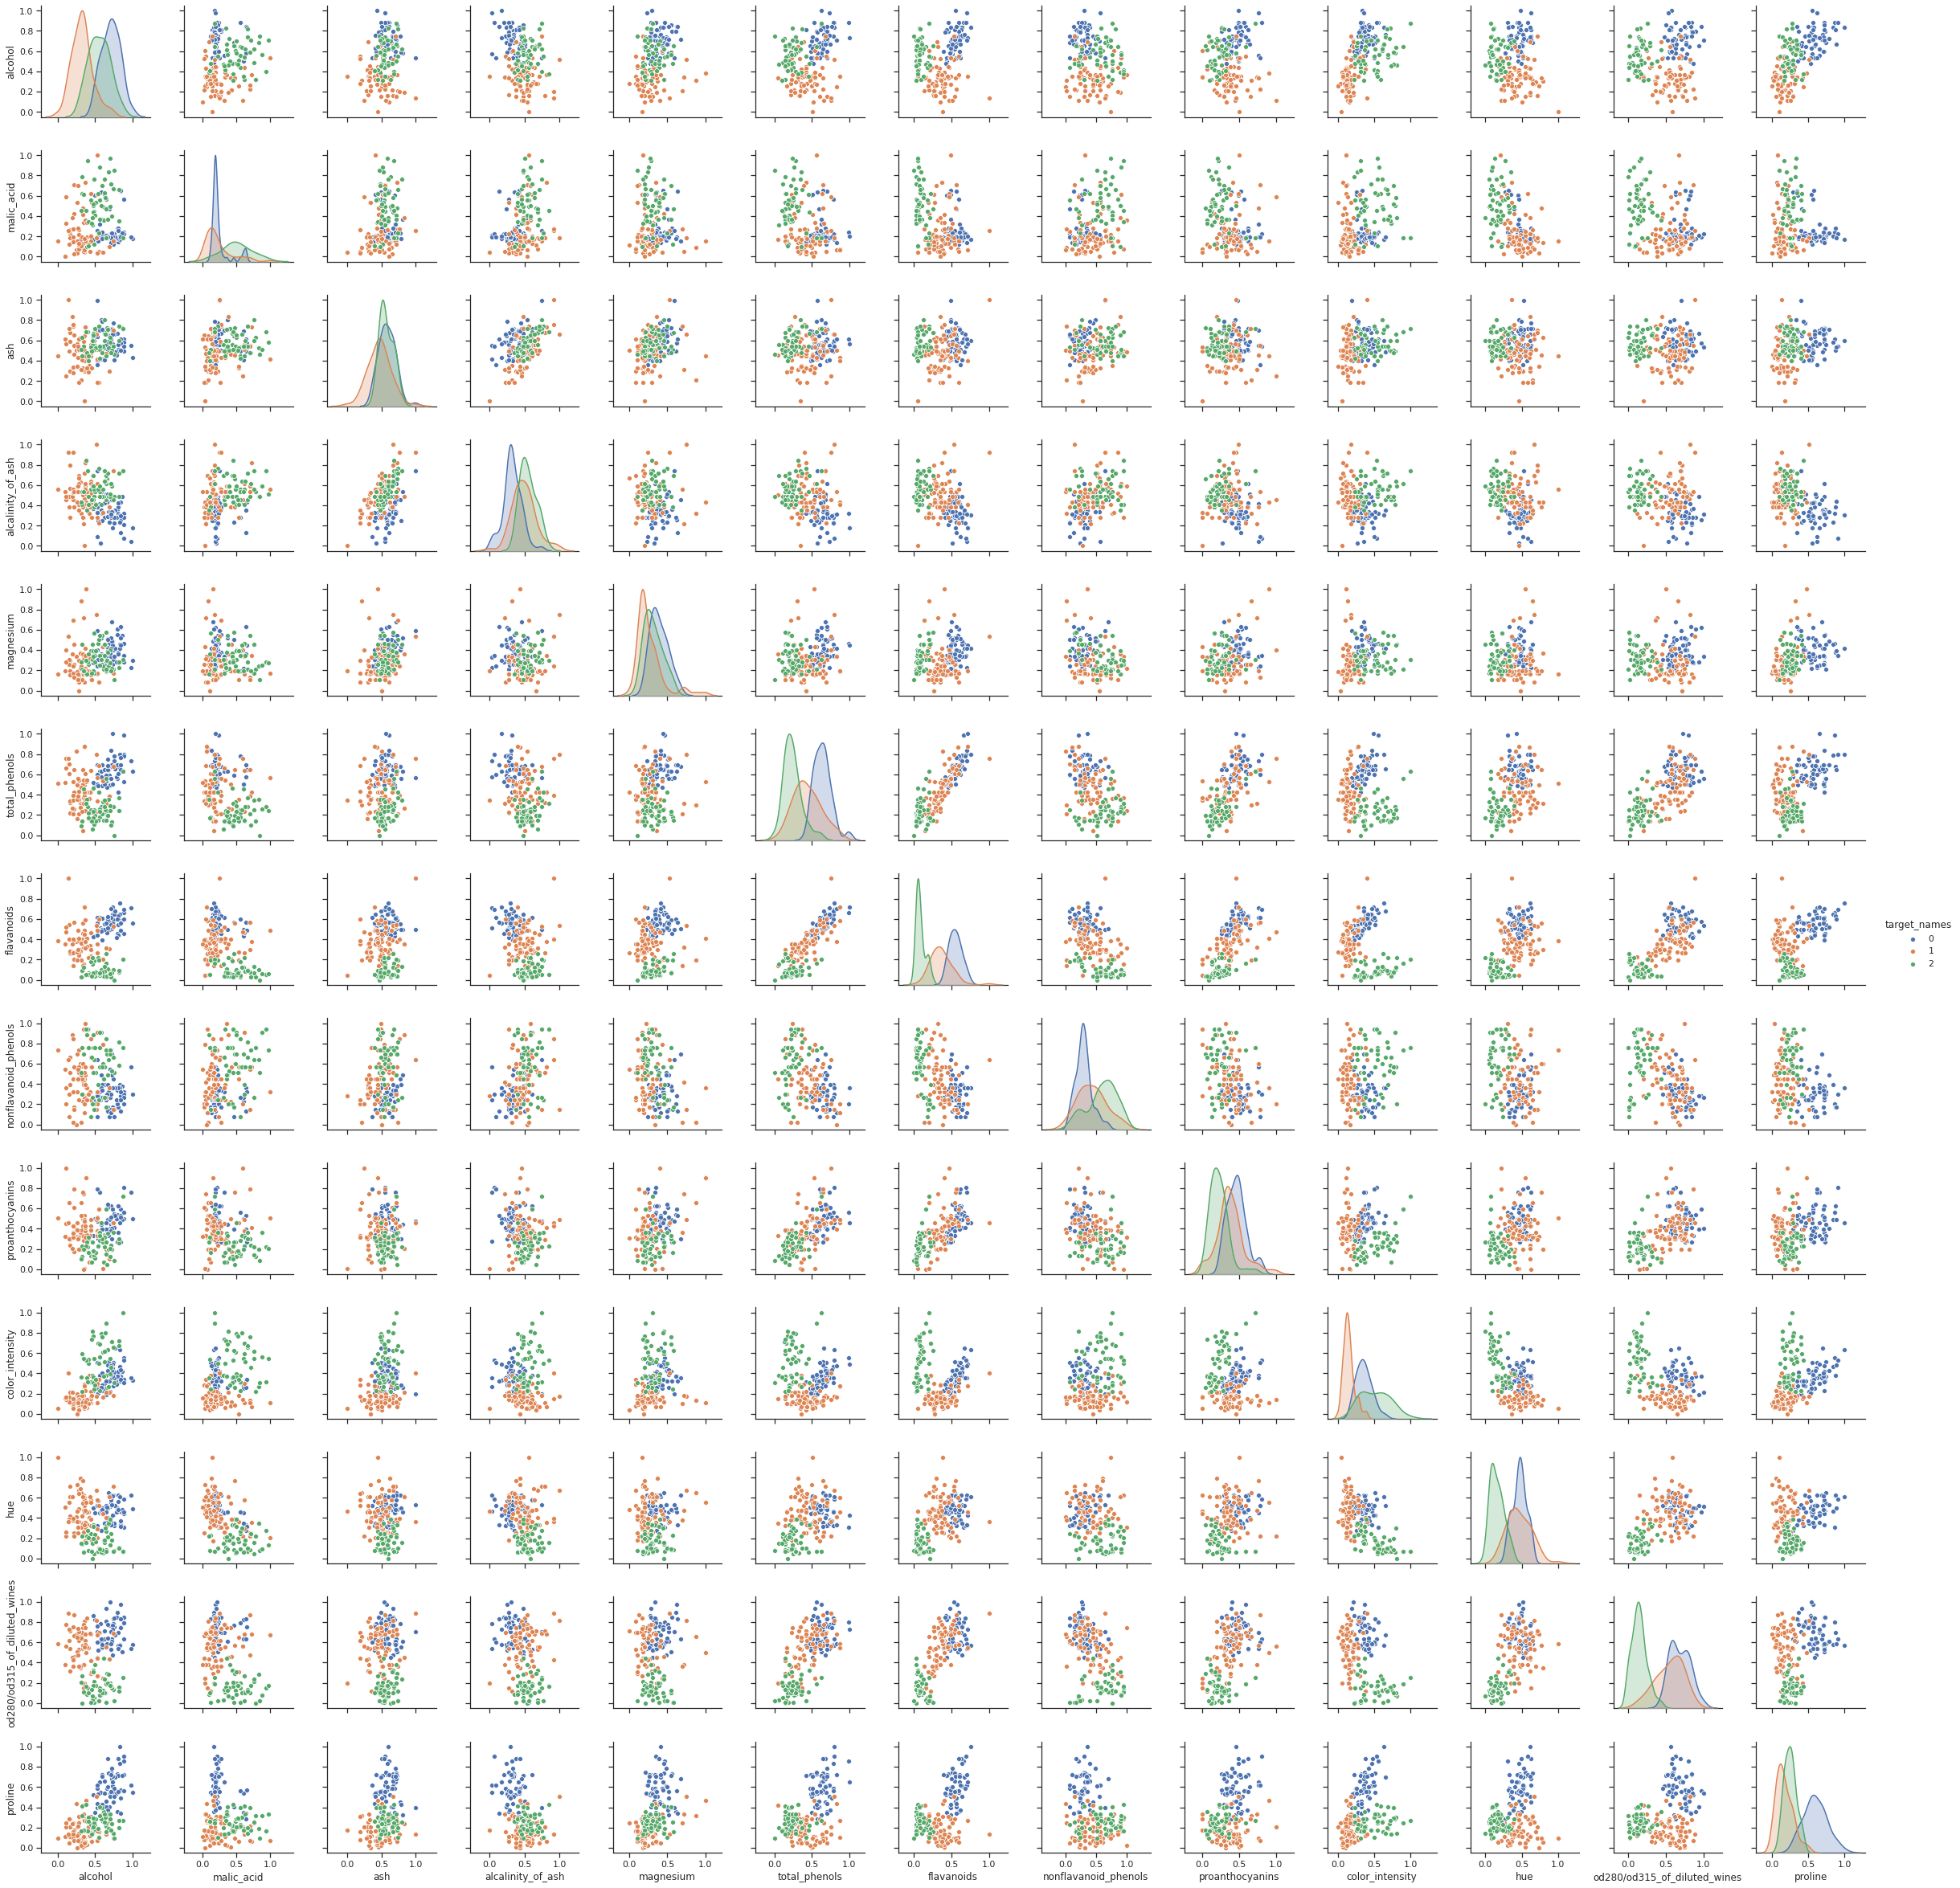

In [ ]:
df = pd.DataFrame(wines, columns=labels)
df['target_names'] = target
#wines.target
g = sns.pairplot(df,  hue="target_names")

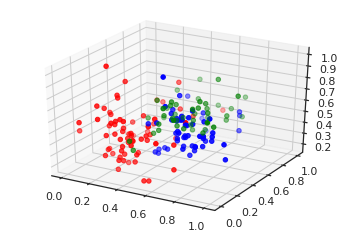

In [ ]:
ax = plt.axes(projection='3d')

X = np.array(wines)
ax.scatter3D(X[:59,0], X[:59,1], X[:59,2], c="blue")
ax.scatter3D(X[60:130,0], X[60:130,1], X[60:130,2], c="red")
ax.scatter3D(X[131:,0], X[131:,1], X[131:,2], c="green")

In [ ]:
np.random.seed(10)
class Rosenblatt(object):

    def __init__(self, no_of_inputs=3, threshold=50, learning_rate=0.25):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        self.score = []
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):

        for _ in range(self.threshold):
             
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
    
    def rate(self, XX, YY):
        total = 0
        for i, element in enumerate(XX):
            total += self.predict(element) == YY[i]
        
        return total / len(XX)


perce = Rosenblatt()
XX = normalizador.fit_transform(np.array(wines.data))
YY = np.array(target)


In [ ]:
labels = [3,11,12]
perce.train(XX[:130, labels], YY[:130])


In [ ]:
print(perce.rate(XX[:130,labels],YY[:130]))

0.8076923076923077


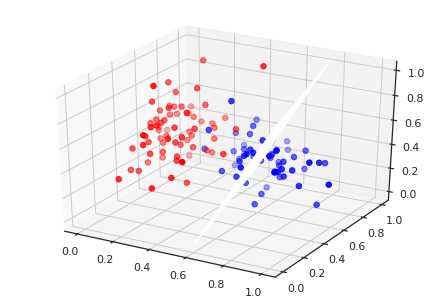

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X_ = normalizador.fit_transform(np.array(wines.data))

#ax = plt.axes(projection='3d')
#ax.scatter3D(X_[:59,0], X_[:59,1], X_[:59,2], c="blue")
#ax.scatter3D(X_[60:130,0], X_[60:130,1], X_[60:130,2], c="red")
#ax.scatter3D(X_[131:,0], X_[131:,1], X_[131:,2], c="green")

def f(x, y, perce):
    return (-perce.weights[1]*x - perce.weights[2] * y - perce.weights[0])/perce.weights[3]  


fig = plt.figure()
ax = Axes3D(fig)

X, Y = np.meshgrid(np.linspace(0,1, num=10), np.linspace(0,1, num=10))
Z = f(X, Y, perce)

ax.plot_surface(Z, Y, X, alpha=0.2, cmap='hot')

a,b,c = [12,11,3]
ax.scatter(X_[:59, a], X_[:59, b], X_[:59, c], c="blue", s=30)
ax.scatter(X_[60:130, a], X_[60:130, b], X_[60:130, c], c="red", s=30)



#


# Entrenar el modelo con clase 0 y 2



In [ ]:
perce_2 = Rosenblatt()

XX_2 = np.concatenate((XX[:59],XX[130:]))
YY_2 = np.array([0]*59 + [1]*48)

assert len(XX_2) == len(YY_2)


In [ ]:
perce_2.train(XX_2[:,labels],YY_2)

In [ ]:
print(perce_2.rate(XX_2[:,labels],YY_2))

1.0


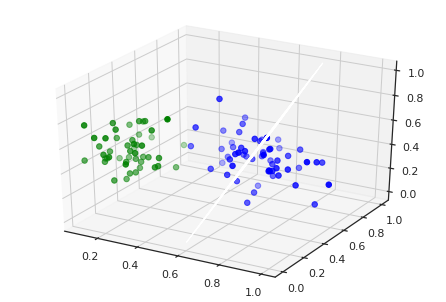

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

X, Y = np.meshgrid(np.linspace(0,1, num=10), np.linspace(0,1, num=10))
Z = f(X, Y, perce)

ax.plot_surface(Z, Y, X, alpha=0.2, cmap='hot')

a,b,c = [12,11,3]
ax.scatter(X_[:59, a], X_[:59, b], X_[:59, c], c="blue", s=30)
ax.scatter(X_[130:, a], X_[130:, b], X_[130:, c], c="green", s=30)


# Entrenar el modelo con clase 1 y 2

In [ ]:
perce_3 = Rosenblatt()

XX_3 = np.concatenate((XX[59:130],XX[130:]))
YY_3 = np.array([0]*len(XX[59:130]) + [1]*48)

assert len(XX_3) == len(YY_3)


In [ ]:
perce_3.train(XX_3[:,labels],YY_3)

In [ ]:
print(perce_2.rate(XX_2[:,labels],YY_2))

1.0


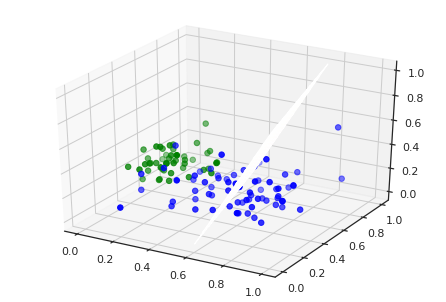

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

X, Y = np.meshgrid(np.linspace(0,1, num=10), np.linspace(0,1, num=10))
Z = f(X, Y, perce)

ax.plot_surface(Z, Y, X, alpha=0.2, cmap='hot')

a,b,c = [11,3,12]
ax.scatter(X_[59:130, a], X_[59:130, b], X_[59:130, c], c="blue", s=30)
ax.scatter(X_[130:, a], X_[130:, b], X_[130:, c], c="green", s=30)